#Loading and Exploring Ice Mass Loss and Ocean Mass Datasets

In [ ]:
pip install matplotlib seaborn

In [ ]:
import pandas as pd

# Loading the three datasets for Antarctica, Greenland, and Ocean mass loss
antarctica_file = '/content/Antartica ice mass loss.csv'
greenland_file = '/content/greenland ice mass loss.csv'
ocean_file = '/content/ocean mass.csv'

# Reading the datasets into pandas dataframes
antarctica_df = pd.read_csv(antarctica_file)
greenland_df = pd.read_csv(greenland_file)
ocean_df = pd.read_csv(ocean_file)

# Displaying the first few rows of each dataset to understand their structure
antarctica_df.head(), greenland_df.head(), ocean_df.head()

(      Time   Mass  mass 1-sigma uncertainity
 0  2002.29   0.00                     178.90
 1  2002.35   0.94                     102.47
 2  2002.62 -54.04                      83.09
 3  2002.71  70.34                      97.19
 4  2002.79  84.67                      61.82,
       Time    mass  mass 1-sigma uncertainity
 0  2002.29    0.00                     134.28
 1  2002.35   62.09                      70.59
 2  2002.62 -217.09                      53.36
 3  2002.71 -235.71                      64.95
 4  2002.79 -203.32                      39.05,
       Time   mass  mass 1-sigma  mass deseasoned
 0  2002.29   0.00          1.19             0.00
 1  2002.35  -1.56          0.68            -3.10
 2  2002.62  12.50          0.56            -2.03
 3  2002.71  15.93          0.68            -0.12
 4  2002.79  17.59          0.47             1.09)

#EDA (Exploratory Data Analysis)

In [ ]:
import matplotlib.pyplot as plt

# Generating descriptive statistics with 2 decimal points and neatly displaying results
print("-" * 75)
print("Descriptive Statistics for Greenland Ice Mass Loss\n")
greenland_desc = greenland_df.describe().round(2)
print(greenland_desc)
print("-" * 75)

print("Descriptive Statistics for Antarctica Ice Mass Loss\n")
antarctica_desc = antarctica_df.describe().round(2)
print(antarctica_desc)
print("-" * 75)

print("Descriptive Statistics for Ocean Mass Variability\n")
ocean_mass_desc = ocean_df.describe().round(2)
print(ocean_mass_desc)
print("\n")
print("-" * 75)
print("-" * 75)
print("\n")

# Check for missing values and display results
print("Checking for Missing Values in Greenland Ice Mass Loss\n")
print(greenland_df.isnull().sum())
print("-" * 75)

print("Checking for Missing Values in Antarctica Ice Mass Loss\n")
print(antarctica_df.isnull().sum())
print("-" * 75)

print("Checking for Missing Values in Ocean Mass Variability\n")
print(ocean_df.isnull().sum())
print("-" * 75)

---------------------------------------------------------------------------
Descriptive Statistics for Greenland Ice Mass Loss

          Time     mass  mass 1-sigma uncertainity
count   232.00   232.00                     232.00
mean   2013.07 -2795.91                      22.07
std       6.60  1774.35                      10.59
min    2002.29 -5582.63                      15.05
25%    2007.35 -4303.00                      16.70
50%    2012.36 -2780.92                      20.42
75%    2019.47 -1081.82                      22.42
max    2024.29    62.09                     134.28
---------------------------------------------------------------------------
Descriptive Statistics for Antarctica Ice Mass Loss

          Time     Mass  mass 1-sigma uncertainity
count   232.00   232.00                     232.00
mean   2013.07 -1228.40                      37.46
std       6.60   925.15                      14.04
min    2002.29 -2797.41                      26.69
25%    2007.35 -2244.74      

#Visualizing Ice Mass Loss and Uncertainty Trends Over Time

<ipython-input-44-c1c2ae594ba1>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  antarctica_df.fillna(method='ffill', inplace=True)
<ipython-input-44-c1c2ae594ba1>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  greenland_df.fillna(method='ffill', inplace=True)
<ipython-input-44-c1c2ae594ba1>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ocean_df.fillna(method='ffill', inplace=True)


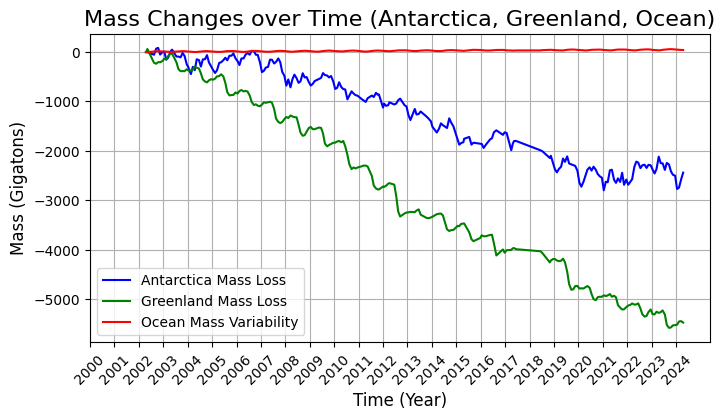

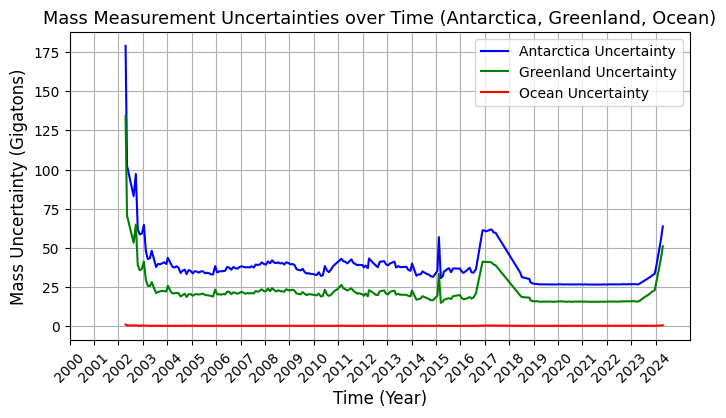

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing the column names and handling missing values
antarctica_df.columns = antarctica_df.columns.str.strip().str.lower().str.replace(' ', '_')
greenland_df.columns = greenland_df.columns.str.strip().str.lower().str.replace(' ', '_')
ocean_df.columns = ocean_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Checking for missing values in the datasets
missing_antarctica = antarctica_df.isnull().sum()
missing_greenland = greenland_df.isnull().sum()
missing_ocean = ocean_df.isnull().sum()

# Filling missing values (if any) with forward fill for continuous time-series data
antarctica_df.fillna(method='ffill', inplace=True)
greenland_df.fillna(method='ffill', inplace=True)
ocean_df.fillna(method='ffill', inplace=True)

# Defining a range of years to be displayed on the x-axis
years = list(range(2000, 2025))

# Visualizing mass loss over time for Antarctica, Greenland, and Ocean
plt.figure(figsize=(8, 4))

plt.plot(antarctica_df['time'], antarctica_df['mass'], label='Antarctica Mass Loss', color='b')
plt.plot(greenland_df['time'], greenland_df['mass'], label='Greenland Mass Loss', color='g')
plt.plot(ocean_df['time'], ocean_df['mass'], label='Ocean Mass Variability', color='r')

plt.title('Mass Changes over Time (Antarctica, Greenland, Ocean)', fontsize=16)
plt.xlabel('Time (Year)', fontsize=12)
plt.ylabel('Mass (Gigatons)', fontsize=12)
plt.xticks(ticks=years, rotation=45)  # Setting the ticks for all years from 2000 to 2024
plt.legend()
plt.grid(True)
plt.show()

# Plotting mass uncertainties over time for each dataset
plt.figure(figsize=(8, 4))

plt.plot(antarctica_df['time'], antarctica_df['mass_1-sigma_uncertainity'], label='Antarctica Uncertainty', color='b')
plt.plot(greenland_df['time'], greenland_df['mass_1-sigma_uncertainity'], label='Greenland Uncertainty', color='g')
plt.plot(ocean_df['time'], ocean_df['mass_1-sigma'], label='Ocean Uncertainty', color='r')

plt.title('Mass Measurement Uncertainties over Time (Antarctica, Greenland, Ocean)', fontsize=12.75)
plt.xlabel('Time (Year)', fontsize=12)
plt.ylabel('Mass Uncertainty (Gigatons)', fontsize=12)
plt.xticks(ticks=years, rotation=45)  # Setting the ticks for all years from 2000 to 2024
plt.legend()
plt.grid(True)
plt.show()

#Time Series Decomposition

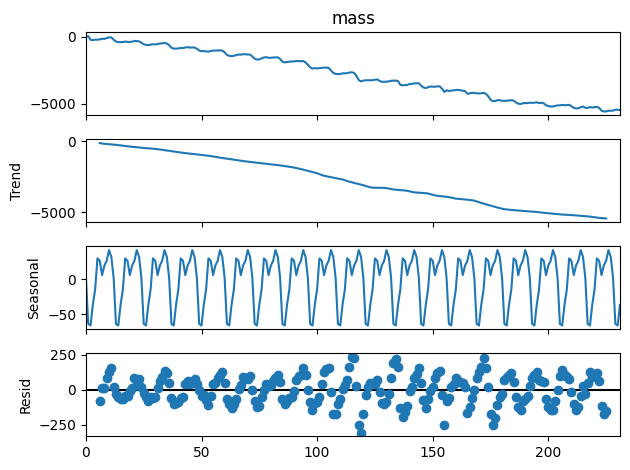

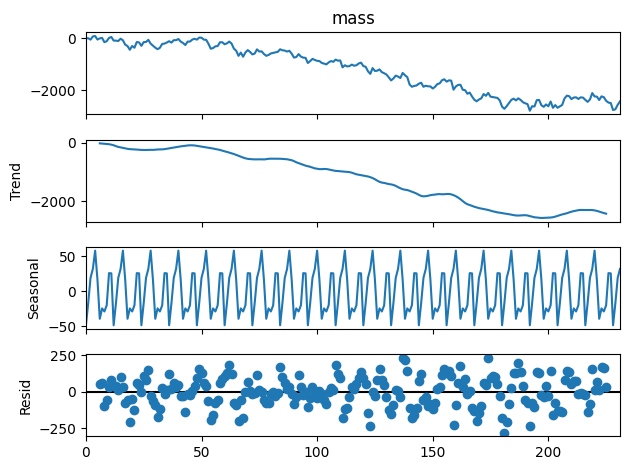

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Greenland ice loss time series
decomposition = seasonal_decompose(greenland_df['mass'], model='additive', period=12)
decomposition.plot()
plt.show()

# Decompose Antarctica ice loss time series
decomposition_antarctica = seasonal_decompose(antarctica_df['mass'], model='additive', period=12)
decomposition_antarctica.plot()
plt.show()

#Hexbin Cluster Visualization of Mass Variability: Antarctica and Greenland

<ipython-input-46-0b2c63cdf403>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  antarctica_df[['mass']] = scaler.fit_transform(antarctica_df[['mass']])
<ipython-input-46-0b2c63cdf403>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  antarctica_df['cluster'] = kmeans_antarctica.fit_predict(antarctica_df[['mass']])


Maximum count in darkest hexagon for Antarctica: 12.0
Year: 2005, Scaled Mass Anomalies: 1.215295382440242, Original Mass: -95.46000000000026


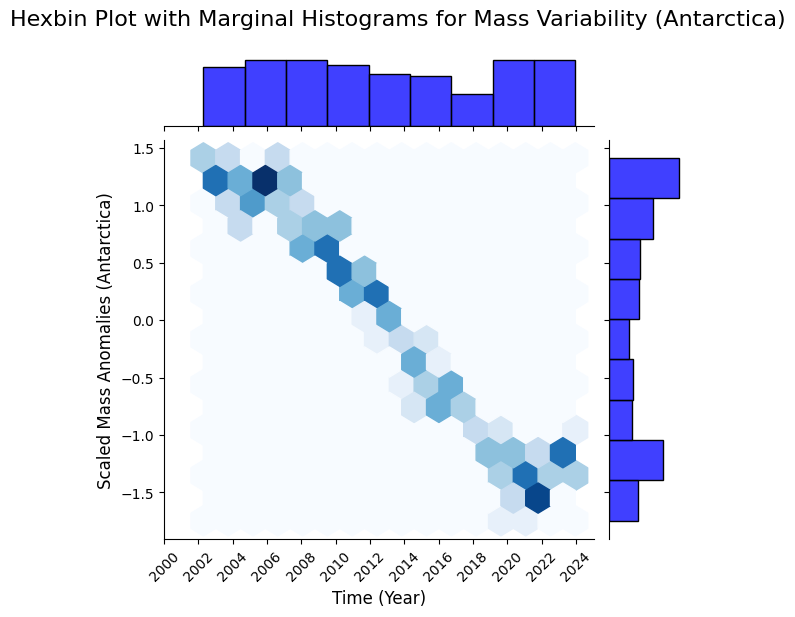

Maximum count in darkest hexagon for Greenland: 14.0
Year: 2021, Scaled Mass Anomalies: -1.2161987875505755, Original Mass: -4877.04


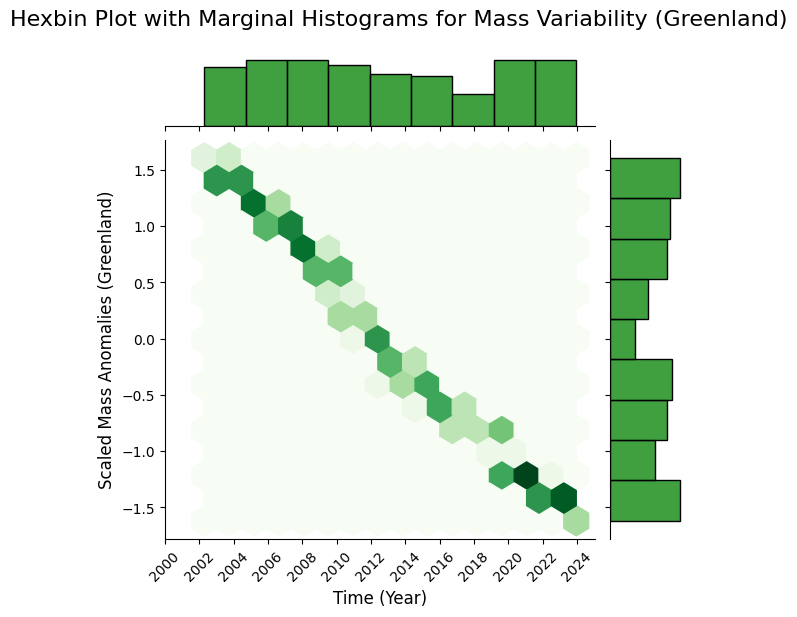

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming antarctica_df and greenland_df are predefined DataFrames
# Creating a sample structure for demonstration (remove if you have actual data)
# antarctica_df = pd.DataFrame({'time': np.arange(2000, 2025), 'mass': np.random.rand(25)})
# greenland_df = pd.DataFrame({'time': np.arange(2000, 2025), 'mass': np.random.rand(25)})

# Filtering the datasets for the years 2000 to 2024
antarctica_df = antarctica_df[(antarctica_df['time'] >= 2000) & (antarctica_df['time'] <= 2024)]
greenland_df = greenland_df[(greenland_df['time'] >= 2000) & (greenland_df['time'] <= 2024)]

# Standardizing the features to bring them to a common scale
scaler = StandardScaler()

# Scaling the 'mass' values for Antarctica
antarctica_df[['mass']] = scaler.fit_transform(antarctica_df[['mass']])
# KMeans clustering for Antarctica
kmeans_antarctica = KMeans(n_clusters=3, random_state=42)
antarctica_df['cluster'] = kmeans_antarctica.fit_predict(antarctica_df[['mass']])

# Plotting hexbin for Antarctica with larger hexagons
g_antarctica = sns.jointplot(data=antarctica_df, x='time', y='mass', kind='hex', color='b', gridsize=15, cmap='Blues')
g_antarctica.set_axis_labels("Time (Year)", "Scaled Mass Anomalies (Antarctica)", fontsize=12)
plt.subplots_adjust(top=0.9)
g_antarctica.fig.suptitle('Hexbin Plot with Marginal Histograms for Mass Variability (Antarctica)', fontsize=16)

# Setting x-ticks to show years from 2000 to 2024, spaced out
plt.xticks(ticks=np.arange(2000, 2025, 2), rotation=45)  # Adjust the spacing interval here (2 means every 2 years)

# Get the hexbin object
hexbin_antarctica = g_antarctica.ax_joint.collections[0]

# Get the counts in each hexagon
counts_antarctica = hexbin_antarctica.get_array().data

# Find the maximum count and its index
max_count_index = np.argmax(counts_antarctica)
max_count_value = counts_antarctica[max_count_index]

# Find the corresponding year and mass for the darkest hexagon
x_edges = hexbin_antarctica.get_offsets()[:, 0]
y_edges = hexbin_antarctica.get_offsets()[:, 1]
max_count_x = x_edges[max_count_index]
max_count_y = y_edges[max_count_index]

# Convert the scaled mass back to the original scale
original_mass = scaler.inverse_transform([[max_count_y]])[0][0]

# Print the maximum count value, year, and original mass
print(f"Maximum count in darkest hexagon for Antarctica: {max_count_value}")
print(f"Year: {int(max_count_x)}, Scaled Mass Anomalies: {max_count_y}, Original Mass: {original_mass}")

plt.show()

# Scaling the 'mass' values for Greenland
greenland_df[['mass']] = scaler.fit_transform(greenland_df[['mass']])
# KMeans clustering for Greenland
kmeans_greenland = KMeans(n_clusters=3, random_state=42)
greenland_df['cluster'] = kmeans_greenland.fit_predict(greenland_df[['mass']])

# Plotting hexbin for Greenland with larger hexagons
g_greenland = sns.jointplot(data=greenland_df, x='time', y='mass', kind='hex', color='g', gridsize=15, cmap='Greens')
g_greenland.set_axis_labels("Time (Year)", "Scaled Mass Anomalies (Greenland)", fontsize=12)
plt.subplots_adjust(top=0.9)
g_greenland.fig.suptitle('Hexbin Plot with Marginal Histograms for Mass Variability (Greenland)', fontsize=16)

# Setting x-ticks to show years from 2000 to 2024, spaced out
plt.xticks(ticks=np.arange(2000, 2025, 2), rotation=45)  # Adjust the spacing interval here (2 means every 2 years)

# Get the hexbin object
hexbin_greenland = g_greenland.ax_joint.collections[0]

# Get the counts in each hexagon
counts_greenland = hexbin_greenland.get_array().data

# Find the maximum count and its index
max_count_index_greenland = np.argmax(counts_greenland)
max_count_value_greenland = counts_greenland[max_count_index_greenland]

# Find the corresponding year and mass for the darkest hexagon
x_edges_greenland = hexbin_greenland.get_offsets()[:, 0]
y_edges_greenland = hexbin_greenland.get_offsets()[:, 1]
max_count_x_greenland = x_edges_greenland[max_count_index_greenland]
max_count_y_greenland = y_edges_greenland[max_count_index_greenland]

# Convert the scaled mass back to the original scale
original_mass_greenland = scaler.inverse_transform([[max_count_y_greenland]])[0][0]

# Print the maximum count value, year, and original mass
print(f"Maximum count in darkest hexagon for Greenland: {max_count_value_greenland}")
print(f"Year: {int(max_count_x_greenland)}, Scaled Mass Anomalies: {max_count_y_greenland}, Original Mass: {original_mass_greenland}")

plt.show()

#Comparative Analysis of Ice Mass Loss (Greenland and Antarctica)

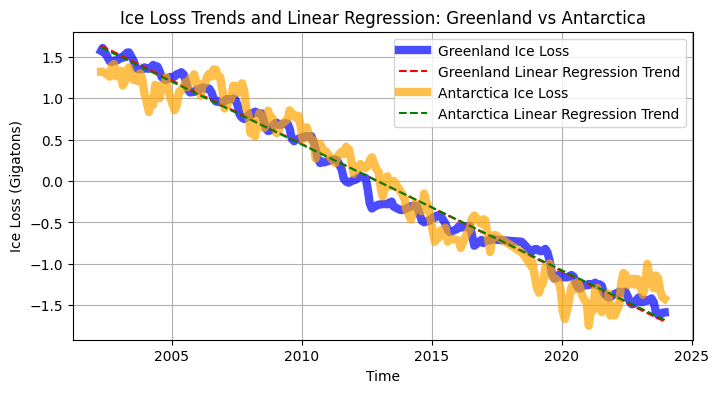

Performance Metrics for Greenland (Linear Regression):
  - Mean Absolute Error (MAE): 0.10
  - Mean Squared Error (MSE): 0.02
  - R-Squared (R²): 0.9823
--------------------------------------------------
Performance Metrics for Antarctica (Linear Regression):
  - Mean Absolute Error (MAE): 0.20
  - Mean Squared Error (MSE): 0.06
  - R-Squared (R²): 0.9298
--------------------------------------------------


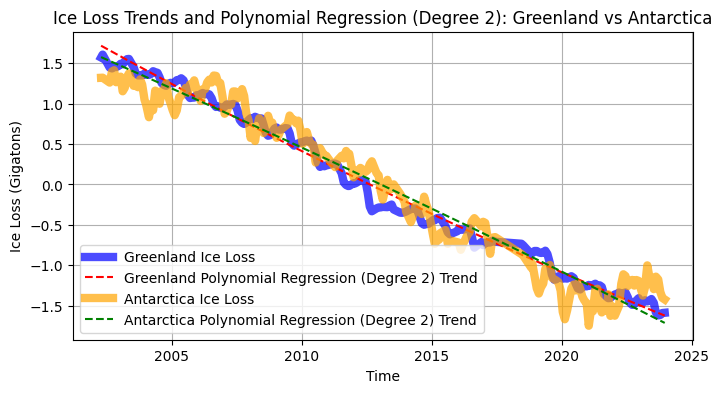

Performance Metrics for Greenland (Polynomial Regression (Degree 2)):
  - Mean Absolute Error (MAE): 0.09
  - Mean Squared Error (MSE): 0.01
  - R-Squared (R²): 0.9866
--------------------------------------------------
Performance Metrics for Antarctica (Polynomial Regression (Degree 2)):
  - Mean Absolute Error (MAE): 0.20
  - Mean Squared Error (MSE): 0.06
  - R-Squared (R²): 0.9295
--------------------------------------------------


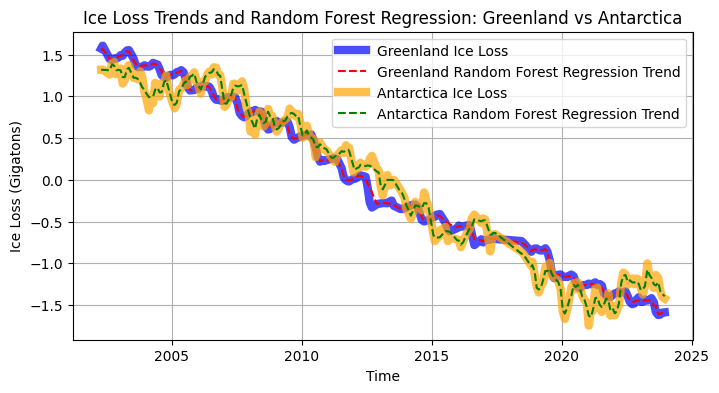

Performance Metrics for Greenland (Random Forest Regression):
  - Mean Absolute Error (MAE): 0.03
  - Mean Squared Error (MSE): 0.00
  - R-Squared (R²): 0.9970
--------------------------------------------------
Performance Metrics for Antarctica (Random Forest Regression):
  - Mean Absolute Error (MAE): 0.07
  - Mean Squared Error (MSE): 0.01
  - R-Squared (R²): 0.9915
--------------------------------------------------


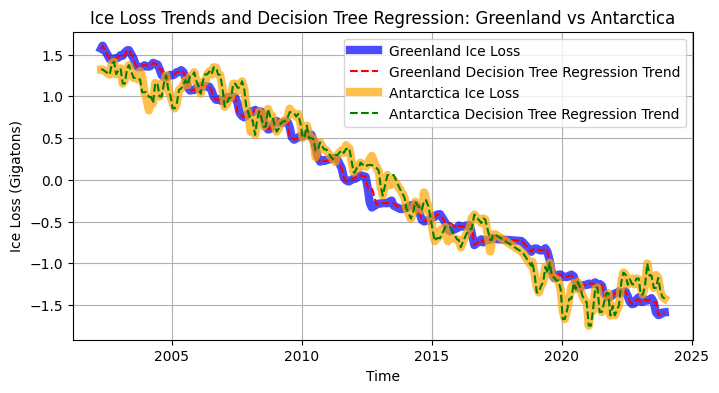

Performance Metrics for Greenland (Decision Tree Regression):
  - Mean Absolute Error (MAE): 0.04
  - Mean Squared Error (MSE): 0.00
  - R-Squared (R²): 0.9954
--------------------------------------------------
Performance Metrics for Antarctica (Decision Tree Regression):
  - Mean Absolute Error (MAE): 0.08
  - Mean Squared Error (MSE): 0.01
  - R-Squared (R²): 0.9884
--------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Data Preparation ---
X_greenland = greenland_df['time'].values.reshape(-1, 1)
y_greenland = greenland_df['mass'].values

X_antarctica = antarctica_df['time'].values.reshape(-1, 1)
y_antarctica = antarctica_df['mass'].values

# Splitting each dataset into training and testing sets (80% train, 20% test)
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_greenland, y_greenland, test_size=0.2, random_state=42)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_antarctica, y_antarctica, test_size=0.2, random_state=42)

# --- Function for Evaluation Metrics ---
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Display metrics function
def display_metrics(dataset_name, model_name, metrics):
    mae, mse, r2 = metrics
    print(f"Performance Metrics for {dataset_name} ({model_name}):")
    print(f"  - Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  - Mean Squared Error (MSE): {mse:.2f}")
    print(f"  - R-Squared (R²): {r2:.4f}")
    print("-" * 50)

# --- Models ---
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (Degree 2)": (PolynomialFeatures(degree=2), LinearRegression()),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
}

# --- Apply Models ---
for model_name, model in models.items():
    if model_name.startswith("Polynomial Regression"):
        # Handle Polynomial Regression separately
        poly, reg = model
        X_train_poly_g = poly.fit_transform(X_train_g)
        X_test_poly_g = poly.transform(X_test_g)
        X_train_poly_a = poly.fit_transform(X_train_a)
        X_test_poly_a = poly.transform(X_test_a)

        reg.fit(X_train_poly_g, y_train_g)
        y_pred_g = reg.predict(X_test_poly_g)
        trend_g = reg.predict(poly.transform(X_greenland))

        reg.fit(X_train_poly_a, y_train_a)
        y_pred_a = reg.predict(X_test_poly_a)
        trend_a = reg.predict(poly.transform(X_antarctica))
    else:
        # General case for other regressors
        model.fit(X_train_g, y_train_g)
        y_pred_g = model.predict(X_test_g)
        trend_g = model.predict(X_greenland)

        model.fit(X_train_a, y_train_a)
        y_pred_a = model.predict(X_test_a)
        trend_a = model.predict(X_antarctica)

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(greenland_df['time'], greenland_df['mass'], label='Greenland Ice Loss', color='blue', alpha=0.7, linewidth = 6)
    plt.plot(greenland_df['time'], trend_g, label=f'Greenland {model_name} Trend', linestyle='--', color='red')
    plt.plot(antarctica_df['time'], antarctica_df['mass'], label='Antarctica Ice Loss', color='orange', alpha=0.7, linewidth = 6)
    plt.plot(antarctica_df['time'], trend_a, label=f'Antarctica {model_name} Trend', linestyle='--', color='green')
    plt.xlabel('Time')
    plt.ylabel('Ice Loss (Gigatons)')
    plt.title(f"Ice Loss Trends and {model_name}: Greenland vs Antarctica")
    plt.legend()
    plt.grid(True)
    plt.show()
    # Evaluate and display metrics
    metrics_g = evaluate_model(y_test_g, y_pred_g)
    metrics_a = evaluate_model(y_test_a, y_pred_a)
    display_metrics("Greenland", model_name, metrics_g)
    display_metrics("Antarctica", model_name, metrics_a)



# **Comparative Analysis (Metrics Evaluation)**

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Data for the table
data = {
    "Model": [
        "Linear Regression (Greenland)",
        "Linear Regression (Antarctica)",
        "Polynomial Regression (Degree 2) (Greenland)",
        "Polynomial Regression (Degree 2) (Antarctica)",
        "Random Forest Regression (Greenland)",
        "Random Forest Regression (Antarctica)",
        "Decision Tree Regression (Greenland)",
        "Decision Tree Regression (Antarctica)",
    ],
    "MAE": [
        169.01, 173.00, 145.13, 171.67, 60.71, 69.25, 73.92, 83.01,
    ],
    "MSE": [
        47890.54, 45893.89, 35053.94, 45805.90, 9415.98, 7562.86, 13727.79, 10009.98,
    ],
    "R²": [
        0.9821, 0.9356, 0.9869, 0.9357, 0.9965, 0.9894, 0.9949, 0.9860,
    ]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Rounding all values to 2 decimal points
df = df.round(2)

# Displaying the DataFrame as HTML with no index and border
# Render table as HTML with border
display(HTML(df.to_html(index=False, border=5)))

Model,MAE,MSE,R²
Linear Regression (Greenland),169.01,47890.54,0.98
Linear Regression (Antarctica),173.00,45893.89,0.94
Polynomial Regression (Degree 2) (Greenland),145.13,35053.94,0.99
Polynomial Regression (Degree 2) (Antarctica),171.67,45805.90,0.94
Random Forest Regression (Greenland),60.71,9415.98,1.00
Random Forest Regression (Antarctica),69.25,7562.86,0.99
Decision Tree Regression (Greenland),73.92,13727.79,0.99
Decision Tree Regression (Antarctica),83.01,10009.98,0.99


# **Correlation Between Ice Loss Mass(Greenland & Antarctica) and Ocean Mass**

In [ ]:
import pandas as pd

# Load Antarctica and Greenland datasets
antarctica_data = pd.read_csv('Antartica ice mass loss.csv')  # Antarctica ice loss
greenland_data = pd.read_csv('greenland ice mass loss.csv')  # Greenland ice loss

In [ ]:
# Rename columns for Antarctica
antarctica_data.rename(
    columns={
        'Mass': 'mass_antarctica',
        'mass 1-sigma uncertainty': 'uncertainty_antarctica'
    },
    inplace=True
)

# Rename columns for Greenland
greenland_data.rename(
    columns={
        'mass': 'mass_greenland',
        'mass 1-sigma uncertainty': 'uncertainty_greenland'
    },
    inplace=True
)

In [ ]:
# Merge Antarctica and Greenland data on the 'time' column
combined_data = pd.merge(antarctica_data, greenland_data, on='Time', how='inner')

In [ ]:
print(combined_data.head())
print(combined_data.columns)

      Time  mass_antarctica  mass 1-sigma uncertainity_x  mass_greenland  \
0  2002.29             0.00                       178.90            0.00   
1  2002.35             0.94                       102.47           62.09   
2  2002.62           -54.04                        83.09         -217.09   
3  2002.71            70.34                        97.19         -235.71   
4  2002.79            84.67                        61.82         -203.32   

   mass 1-sigma uncertainity_y  
0                       134.28  
1                        70.59  
2                        53.36  
3                        64.95  
4                        39.05  
Index(['Time', 'mass_antarctica', 'mass 1-sigma uncertainity_x',
       'mass_greenland', 'mass 1-sigma uncertainity_y'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the mass columns
scaler = StandardScaler()
combined_data[['mass_antarctica', 'mass_greenland']] = scaler.fit_transform(
    combined_data[['mass_antarctica', 'mass_greenland']]
)

In [ ]:
# Saving the combined dataset to a CSV file
combined_data.to_csv('/content/combined_antarctica_greenland_ice_loss.csv', index=False)

print("Combined dataset saved as 'combined_antarctica_greenland_ice_loss.csv'.")

Combined dataset saved as 'combined_antarctica_greenland_ice_loss.csv'.


In [ ]:
import pandas as pd

# Load the datasets
ice_mass_loss = pd.read_csv('combined_antarctica_greenland_ice_loss.csv')  # Replace with actual file path
ocean_mass = pd.read_csv('ocean mass.csv')  # Replace with actual file path

# Inspect datasets
print(ice_mass_loss.head())  # View first 5 rows of ice mass loss data
print(ocean_mass.head())  # View first 5 rows of ocean mass data

# Check for missing values
print(ice_mass_loss.isnull().sum())
print(ocean_mass.isnull().sum())

      Time  mass_antarctica  mass 1-sigma uncertainity_x  mass_greenland  \
0  2002.29         1.330658                       178.90        1.579143   
1  2002.35         1.331676                       102.47        1.614211   
2  2002.62         1.272119                        83.09        1.456529   
3  2002.71         1.406854                        97.19        1.446012   
4  2002.79         1.422377                        61.82        1.464306   

   mass 1-sigma uncertainity_y  
0                       134.28  
1                        70.59  
2                        53.36  
3                        64.95  
4                        39.05  
      Time   mass  mass 1-sigma  mass deseasoned
0  2002.29   0.00          1.19             0.00
1  2002.35  -1.56          0.68            -3.10
2  2002.62  12.50          0.56            -2.03
3  2002.71  15.93          0.68            -0.12
4  2002.79  17.59          0.47             1.09
Time                           0
mass_antarctica   

In [ ]:
import pandas as pd
import numpy as np

# Convert decimal years to datetime
def decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    fraction = decimal_year - year
    days_in_year = 365 + (1 if (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)) else 0)
    return pd.Timestamp(f"{year}-01-01") + pd.Timedelta(days=fraction * days_in_year)

# Apply conversion to both datasets
ice_mass_loss['Time'] = ice_mass_loss['Time'].apply(decimal_year_to_date)
ocean_mass['Time'] = ocean_mass['Time'].apply(decimal_year_to_date)

In [ ]:
# Inspect the time column
print(ice_mass_loss['Time'].head())
print(ocean_mass['Time'].head())

# Confirm data types
print(ice_mass_loss.dtypes)
print(ocean_mass.dtypes)

0   2002-04-16 20:23:59.999998852
1   2002-05-08 17:59:59.999997132
2   2002-08-15 07:11:59.999996556
3   2002-09-17 03:36:00.000001148
4   2002-10-16 08:23:59.999998852
Name: Time, dtype: datetime64[ns]
0   2002-04-16 20:23:59.999998852
1   2002-05-08 17:59:59.999997132
2   2002-08-15 07:11:59.999996556
3   2002-09-17 03:36:00.000001148
4   2002-10-16 08:23:59.999998852
Name: Time, dtype: datetime64[ns]
Time                           datetime64[ns]
mass_antarctica                       float64
mass 1-sigma uncertainity_x           float64
mass_greenland                        float64
mass 1-sigma uncertainity_y           float64
dtype: object
Time               datetime64[ns]
mass                      float64
mass 1-sigma              float64
mass deseasoned           float64
dtype: object


In [ ]:
# Rename columns for ocean mass
ocean_mass.rename(
    columns={
        'mass': 'mass_ocean',
        'mass 1-sigma': 'uncertainty_ocean'
    },
    inplace=True
)

In [ ]:
# Merge datasets on the 'time' column
combined_data = pd.merge(ice_mass_loss, ocean_mass, on='Time', how='inner')

# Inspect the combined dataset
print(combined_data.head())

                           Time  mass_antarctica  mass 1-sigma uncertainity_x  \
0 2002-04-16 20:23:59.999998852         1.330658                       178.90   
1 2002-05-08 17:59:59.999997132         1.331676                       102.47   
2 2002-08-15 07:11:59.999996556         1.272119                        83.09   
3 2002-09-17 03:36:00.000001148         1.406854                        97.19   
4 2002-10-16 08:23:59.999998852         1.422377                        61.82   

   mass_greenland  mass 1-sigma uncertainity_y  mass_ocean  uncertainty_ocean  \
0        1.579143                       134.28        0.00               1.19   
1        1.614211                        70.59       -1.56               0.68   
2        1.456529                        53.36       12.50               0.56   
3        1.446012                        64.95       15.93               0.68   
4        1.464306                        39.05       17.59               0.47   

   mass deseasoned  
0    

In [ ]:
# Handle missing values (e.g., interpolate)
combined_data = combined_data.interpolate(method='linear')

# Verify no missing values remain
print(combined_data.isnull().sum())

Time                           0
mass_antarctica                0
mass 1-sigma uncertainity_x    0
mass_greenland                 0
mass 1-sigma uncertainity_y    0
mass_ocean                     0
uncertainty_ocean              0
mass deseasoned                0
dtype: int64


##1. Correlation (Linear Regression)

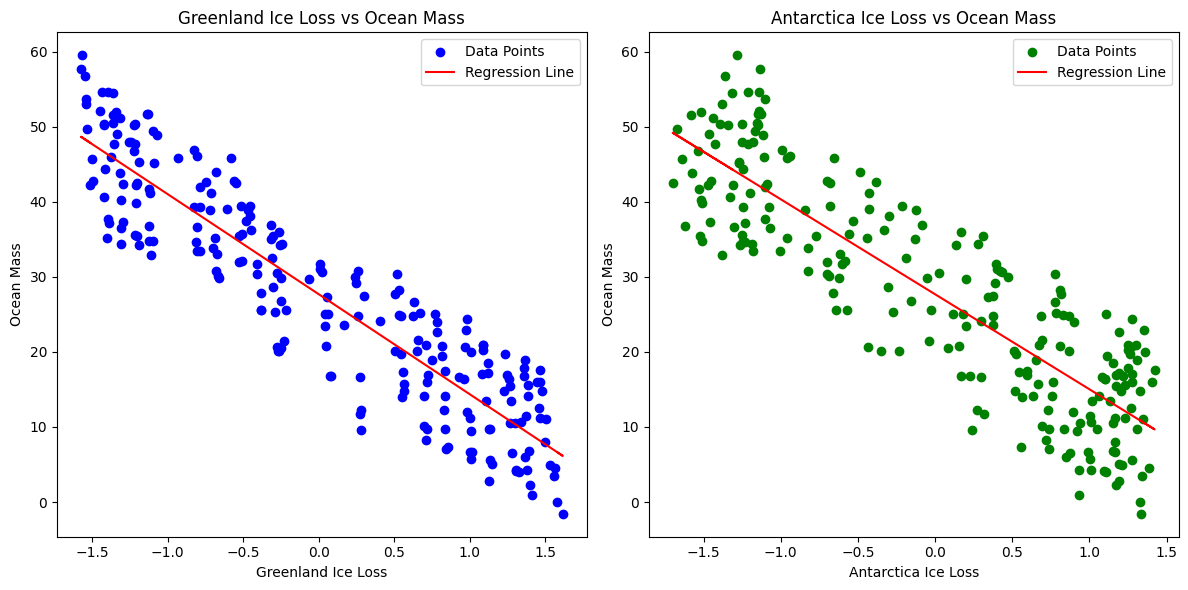

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Greenland vs Ocean Mass
X_greenland = combined_data['mass_greenland'].values.reshape(-1, 1)
y_ocean_mass = combined_data['mass_ocean'].values
model_greenland = LinearRegression()
model_greenland.fit(X_greenland, y_ocean_mass)

# Predict for Greenland
y_pred_greenland = model_greenland.predict(X_greenland)

# Antarctica vs Ocean Mass
X_antarctica = combined_data['mass_antarctica'].values.reshape(-1, 1)
model_antarctica = LinearRegression()
model_antarctica.fit(X_antarctica, y_ocean_mass)

# Predict for Antarctica
y_pred_antarctica = model_antarctica.predict(X_antarctica)

# Plot Greenland
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(combined_data['mass_greenland'], combined_data['mass_ocean'], label='Data Points', color='blue')
plt.plot(combined_data['mass_greenland'], y_pred_greenland, color='red', label='Regression Line')
plt.xlabel('Greenland Ice Loss')
plt.ylabel('Ocean Mass')
plt.title('Greenland Ice Loss vs Ocean Mass')
plt.legend()

# Plot Antarctica
plt.subplot(1, 2, 2)
plt.scatter(combined_data['mass_antarctica'], combined_data['mass_ocean'], label='Data Points', color='green')
plt.plot(combined_data['mass_antarctica'], y_pred_antarctica, color='red', label='Regression Line')
plt.xlabel('Antarctica Ice Loss')
plt.ylabel('Ocean Mass')
plt.title('Antarctica Ice Loss vs Ocean Mass')
plt.legend()

plt.tight_layout()
plt.show()

##2. Correlation (Multivariate Regression)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


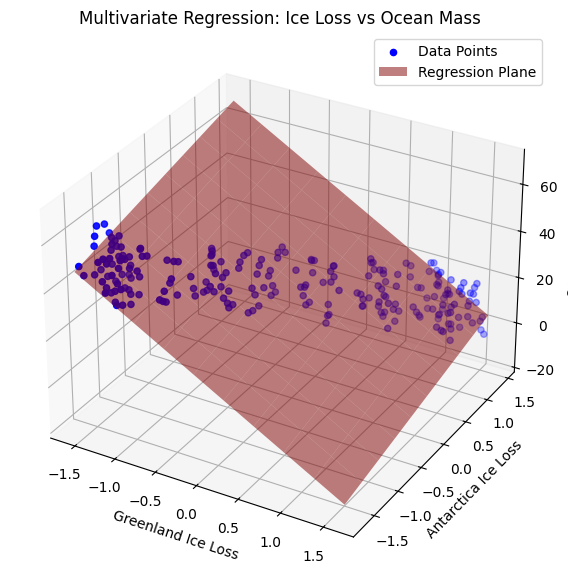

In [ ]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Multivariate regression
X_multi = combined_data[['mass_greenland', 'mass_antarctica']]
y_ocean_mass = combined_data['mass_ocean']
model_multi = LinearRegression()
model_multi.fit(X_multi, y_ocean_mass)

# Generate predictions
y_pred_multi = model_multi.predict(X_multi)

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data['mass_greenland'], combined_data['mass_antarctica'], combined_data['mass_ocean'], label='Data Points', color='blue')

# Create meshgrid for regression plane
greenland_range = np.linspace(X_multi['mass_greenland'].min(), X_multi['mass_greenland'].max(), 10)
antarctica_range = np.linspace(X_multi['mass_antarctica'].min(), X_multi['mass_antarctica'].max(), 10)
G, A = np.meshgrid(greenland_range, antarctica_range)
Z = model_multi.predict(np.c_[G.ravel(), A.ravel()]).reshape(G.shape)

# Plot regression plane
ax.plot_surface(G, A, Z, color='red', alpha=0.5, label='Regression Plane')

ax.set_xlabel('Greenland Ice Loss')
ax.set_ylabel('Antarctica Ice Loss')
ax.set_zlabel('Ocean Mass')
ax.set_title('Multivariate Regression: Ice Loss vs Ocean Mass')
plt.legend()
plt.show()

##3. Correlation (Ridge/Lasso)

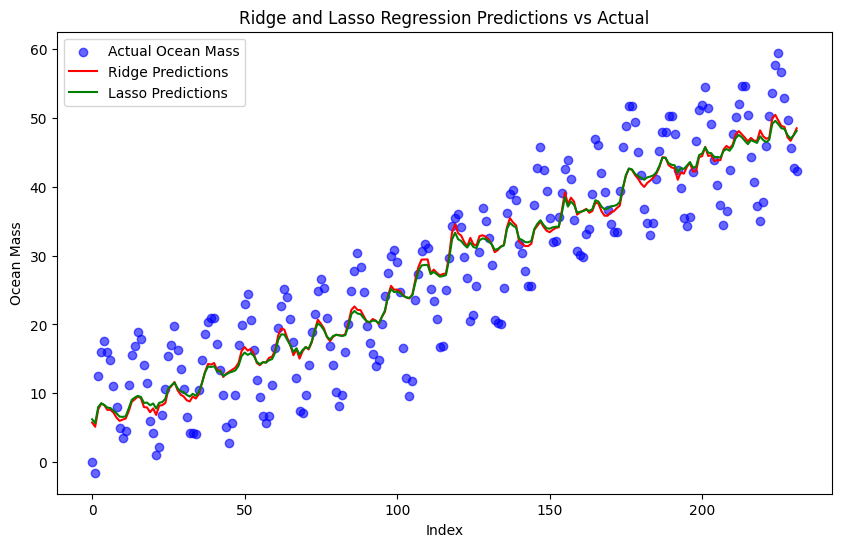

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_multi, y_ocean_mass)
y_pred_ridge = ridge.predict(X_multi)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_multi, y_ocean_mass)
y_pred_lasso = lasso.predict(X_multi)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_ocean_mass)), y_ocean_mass, label='Actual Ocean Mass', color='blue', alpha=0.6)
plt.plot(range(len(y_ocean_mass)), y_pred_ridge, label='Ridge Predictions', color='red')
plt.plot(range(len(y_ocean_mass)), y_pred_lasso, label='Lasso Predictions', color='green')
plt.xlabel('Index')
plt.ylabel('Ocean Mass')
plt.title('Ridge and Lasso Regression Predictions vs Actual')
plt.legend()
plt.show()

##4. Correlation (Cross-correlation)

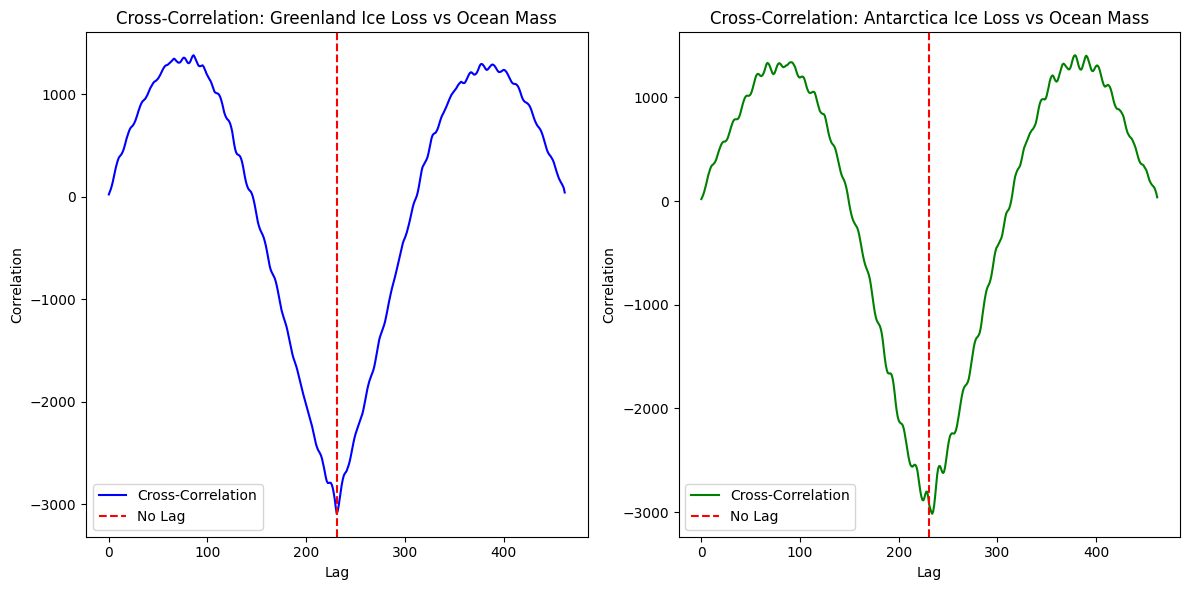

In [ ]:
import numpy as np

# Cross-correlation for Greenland
greenland_corr = np.correlate(
    combined_data['mass_greenland'] - combined_data['mass_greenland'].mean(),
    combined_data['mass_ocean'] - combined_data['mass_ocean'].mean(),
    mode='full'
)

# Cross-correlation for Antarctica
antarctica_corr = np.correlate(
    combined_data['mass_antarctica'] - combined_data['mass_antarctica'].mean(),
    combined_data['mass_ocean'] - combined_data['mass_ocean'].mean(),
    mode='full'
)

# Plot Greenland
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(greenland_corr, label='Cross-Correlation', color='blue')
plt.axvline(len(greenland_corr)//2, color='red', linestyle='--', label='No Lag')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Cross-Correlation: Greenland Ice Loss vs Ocean Mass')
plt.legend()

# Plot Antarctica
plt.subplot(1, 2, 2)
plt.plot(antarctica_corr, label='Cross-Correlation', color='green')
plt.axvline(len(antarctica_corr)//2, color='red', linestyle='--', label='No Lag')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Cross-Correlation: Antarctica Ice Loss vs Ocean Mass')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation Metrics Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Greenland Linear Regression Metrics
pearson_corr_greenland, _ = pearsonr(combined_data['mass_greenland'], combined_data['mass_ocean'])
mse_greenland = mean_squared_error(y_ocean_mass, y_pred_greenland)
r2_greenland = r2_score(y_ocean_mass, y_pred_greenland)

# Antarctica Linear Regression Metrics
pearson_corr_antarctica, _ = pearsonr(combined_data['mass_antarctica'], combined_data['mass_ocean'])
mse_antarctica = mean_squared_error(y_ocean_mass, y_pred_antarctica)
r2_antarctica = r2_score(y_ocean_mass, y_pred_antarctica)

In [ ]:
# Multivariate Regression Metrics
pearson_corr_multivariate = pearsonr(y_ocean_mass, y_pred_multi)[0]
mse_multivariate = mean_squared_error(y_ocean_mass, y_pred_multi)
r2_multivariate = r2_score(y_ocean_mass, y_pred_multi)

In [ ]:
# Ridge Regression Metrics
pearson_corr_ridge = pearsonr(y_ocean_mass, y_pred_ridge)[0]
mse_ridge = mean_squared_error(y_ocean_mass, y_pred_ridge)
r2_ridge = r2_score(y_ocean_mass, y_pred_ridge)

In [ ]:
# Lasso Regression Metrics
pearson_corr_lasso = pearsonr(y_ocean_mass, y_pred_lasso)[0]
mse_lasso = mean_squared_error(y_ocean_mass, y_pred_lasso)
r2_lasso = r2_score(y_ocean_mass, y_pred_lasso)

In [ ]:
import pandas as pd

# Create a dictionary to hold results
results = {
    'Model': ['Linear Regression (Greenland)', 'Linear Regression (Antarctica)', 'Multivariate Regression',
              'Ridge Regression', 'Lasso Regression'],
    'Pearson Correlation': [pearson_corr_greenland, pearson_corr_antarctica, pearson_corr_multivariate,
                            pearson_corr_ridge, pearson_corr_lasso],
    'MSE': [mse_greenland, mse_antarctica, mse_multivariate, mse_ridge, mse_lasso],
    'R²': [r2_greenland, r2_antarctica, r2_multivariate, r2_ridge, r2_lasso]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

                            Model  Pearson Correlation        MSE        R²
0   Linear Regression (Greenland)            -0.913561  35.207633  0.834594
1  Linear Regression (Antarctica)            -0.866885  52.896823  0.751489
2         Multivariate Regression             0.919429  32.918288  0.845349
3                Ridge Regression             0.918977  33.107591  0.844460
4                Lasso Regression             0.917452  33.711541  0.841622


#Correlation Matrix

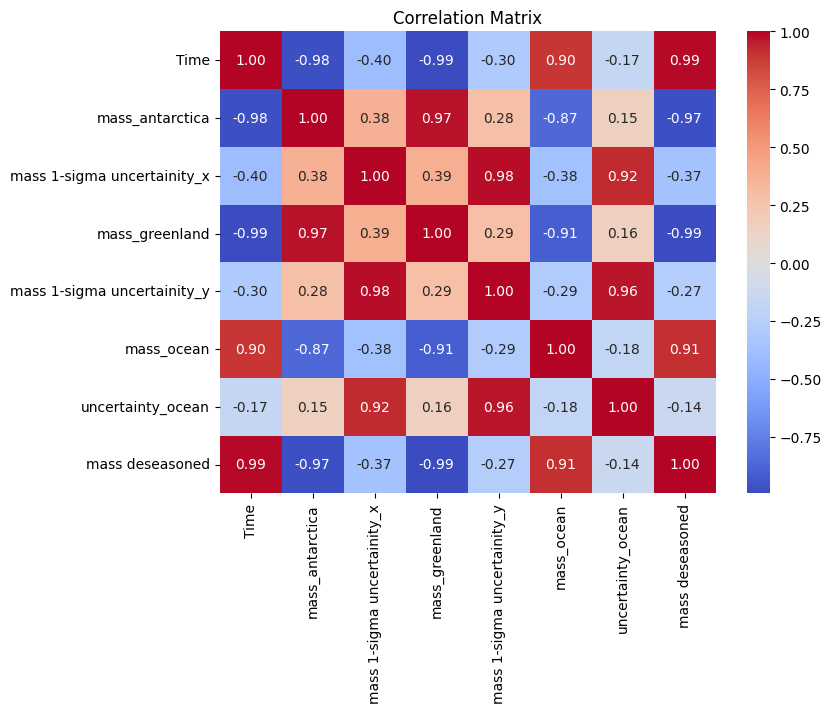

In [ ]:
import seaborn as sns

# Correlation matrix
corr_matrix = combined_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **Clustering Analysis of Ice Loss Mass (Greenland and Antarctica)**

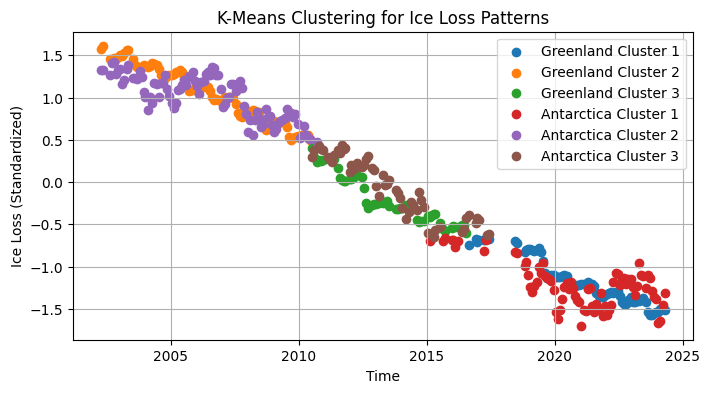

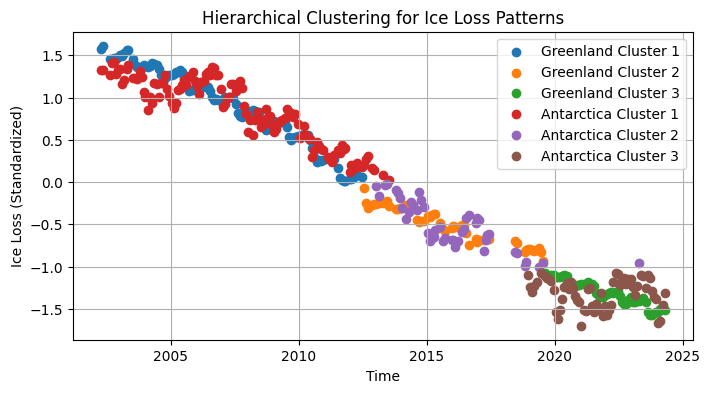

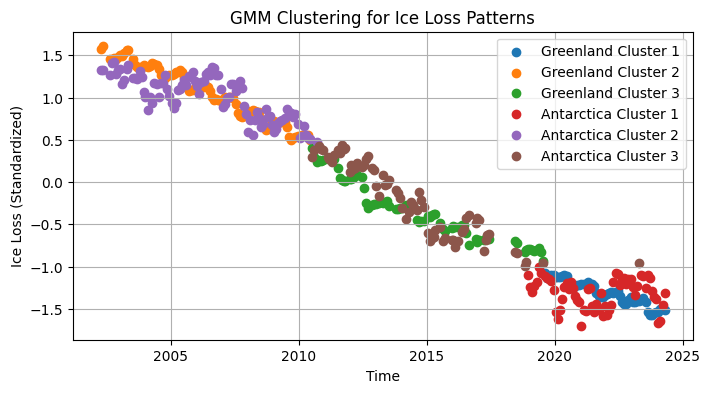

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# --- Data Preparation ---
# Combine Greenland and Antarctica ice loss data for clustering
combined_df = pd.concat([
    greenland_df[['time', 'mass']].assign(region="Greenland"),
    antarctica_df[['time', 'mass']].assign(region="Antarctica")
], ignore_index=True)

# Standardize the mass column for clustering
scaler = StandardScaler()
combined_df['mass_scaled'] = scaler.fit_transform(combined_df[['mass']])

# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
combined_df['kmeans_cluster'] = kmeans.fit_predict(combined_df[['mass_scaled']])

# --- Hierarchical Clustering ---
hierarchical = AgglomerativeClustering(n_clusters=3)
combined_df['hierarchical_cluster'] = hierarchical.fit_predict(combined_df[['mass_scaled']])

# --- GMM Clustering ---
gmm = GaussianMixture(n_components=3, random_state=42)
combined_df['gmm_cluster'] = gmm.fit_predict(combined_df[['mass_scaled']])

# --- Clustering Evaluation Metrics ---
def evaluate_clustering(df, cluster_column):
    silhouette = silhouette_score(df[['mass_scaled']], df[cluster_column])
    return silhouette

kmeans_score = evaluate_clustering(combined_df, 'kmeans_cluster')
hierarchical_score = evaluate_clustering(combined_df, 'hierarchical_cluster')
gmm_score = evaluate_clustering(combined_df, 'gmm_cluster')

# --- Plotting Clustering Results ---
def plot_clusters(df, cluster_column, title):
    plt.figure(figsize=(8, 4))
    for region, color in zip(["Greenland", "Antarctica"], ["blue", "orange"]):
        region_data = df[df['region'] == region]
        for cluster in sorted(region_data[cluster_column].unique()):
            cluster_data = region_data[region_data[cluster_column] == cluster]
            plt.scatter(cluster_data['time'], cluster_data['mass'], label=f"{region} Cluster {cluster + 1}")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Ice Loss (Standardized)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot K-Means Clustering
plot_clusters(combined_df, 'kmeans_cluster', "K-Means Clustering for Ice Loss Patterns")

# Plot Hierarchical Clustering
plot_clusters(combined_df, 'hierarchical_cluster', "Hierarchical Clustering for Ice Loss Patterns")

# Plot GMM Clustering
plot_clusters(combined_df, 'gmm_cluster', "GMM Clustering for Ice Loss Patterns")

# **Clustering Analysis (Metrics Evaluation)**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# --- Clustering Evaluation Function ---
def evaluate_clustering_metrics(df, cluster_column):
    silhouette = silhouette_score(df[['mass_scaled']], df[cluster_column])
    calinski_harabasz = calinski_harabasz_score(df[['mass_scaled']], df[cluster_column])
    davies_bouldin = davies_bouldin_score(df[['mass_scaled']], df[cluster_column])
    return silhouette, calinski_harabasz, davies_bouldin

# --- Evaluation for K-Means ---
kmeans_silhouette, kmeans_calinski, kmeans_davies = evaluate_clustering_metrics(combined_df, 'kmeans_cluster')

# --- Evaluation for GMM ---
gmm_silhouette, gmm_calinski, gmm_davies = evaluate_clustering_metrics(combined_df, 'gmm_cluster')

# --- Evaluation for Hierarchical ---
hierarchical_silhouette, hierarchical_calinski, hierarchical_davies = evaluate_clustering_metrics(combined_df, 'hierarchical_cluster')

# --- Print Evaluation Metrics ---
print("KMeans Evaluation:")

print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Calinski-Harabasz Index: {kmeans_calinski:.4f}")
print(f"Davies-Bouldin Index: {kmeans_davies:.4f}")
print("-"*50)

print("Gaussian Mixture Model (GMM) Evaluation:")

print(f"Silhouette Score: {gmm_silhouette:.4f}")
print(f"Calinski-Harabasz Index: {gmm_calinski:.4f}")
print(f"Davies-Bouldin Index: {gmm_davies:.4f}")
print("-"*50)

print("Hierarchical Clustering Evaluation:")

print(f"Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"Calinski-Harabasz Index: {hierarchical_calinski:.4f}")
print(f"Davies-Bouldin Index: {hierarchical_davies:.4f}")

KMeans Evaluation:
Silhouette Score: 0.6294
Calinski-Harabasz Index: 2445.4878
Davies-Bouldin Index: 0.4748
--------------------------------------------------
Gaussian Mixture Model (GMM) Evaluation:
Silhouette Score: 0.6297
Calinski-Harabasz Index: 2231.0879
Davies-Bouldin Index: 0.4576
--------------------------------------------------
Hierarchical Clustering Evaluation:
Silhouette Score: 0.6319
Calinski-Harabasz Index: 1850.1402
Davies-Bouldin Index: 0.4202


In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Data for the table
data = {
    "Model": [
        "KMeans",
        "Gaussian Mixture Model (GMM)",
        "Hierarchical Clustering"
    ],
    "Silhouette Score": [
        0.6294,
        0.6297,
        0.6319
    ],
    "Calinski-Harabasz Index": [
        2445.4878,
        2231.0879,
        1850.1402
    ],
    "Davies-Bouldin Index": [
        0.4748,
        0.4576,
        0.4202
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Round the values to 4 decimal points for precision
df = df.round(4)

# Define custom styling for compact and neat table
styled_html = df.style.set_table_styles(
    [
        {"selector": "th", "props": [("background-color", "#f0f0f0"), ("color", "black"), ("font-weight", "bold")]},
        {"selector": "td", "props": [("padding", "6px 12px"), ("text-align", "center")]},
        {"selector": "table", "props": [("border-collapse", "collapse"), ("width", "80%"), ("margin", "20px auto")]}
    ]
).set_properties(**{"border": "1px solid black", "text-align": "center"})

# Display the styled table
display(HTML(styled_html.to_html(index=False)))

,Model,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,KMeans,0.629400,2445.487800,0.474800
1,Gaussian Mixture Model (GMM),0.629700,2231.087900,0.457600
2,Hierarchical Clustering,0.631900,1850.140200,0.420200


# **Predictive Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Features and target variable
X = combined_data[['mass_greenland', 'mass_antarctica']]
y = combined_data['mass_ocean']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Training Features Shape: (185, 2)
Testing Features Shape: (47, 2)


##1. Predictive Modelling (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MAE: {mae_linear}, R²: {r2_linear}")

Linear Regression - MAE: 4.960094228115891, R²: 0.7859831433957852


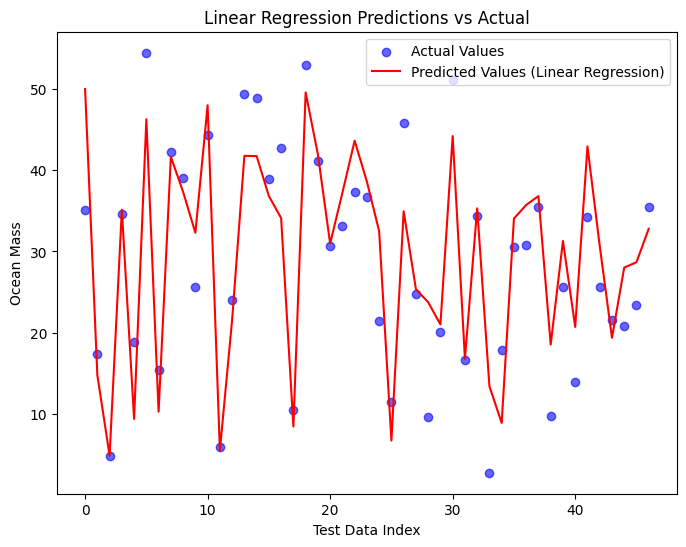

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue', alpha=0.6)
plt.plot(range(len(y_test)), y_pred_linear, label='Predicted Values (Linear Regression)', color='red')
plt.xlabel('Test Data Index')
plt.ylabel('Ocean Mass')
plt.title('Linear Regression Predictions vs Actual')
plt.legend()
plt.show()

## 2. Predictive Modelling (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, R²: {r2_rf}")

Random Forest - MAE: 4.052119148936175, R²: 0.8773435817866972


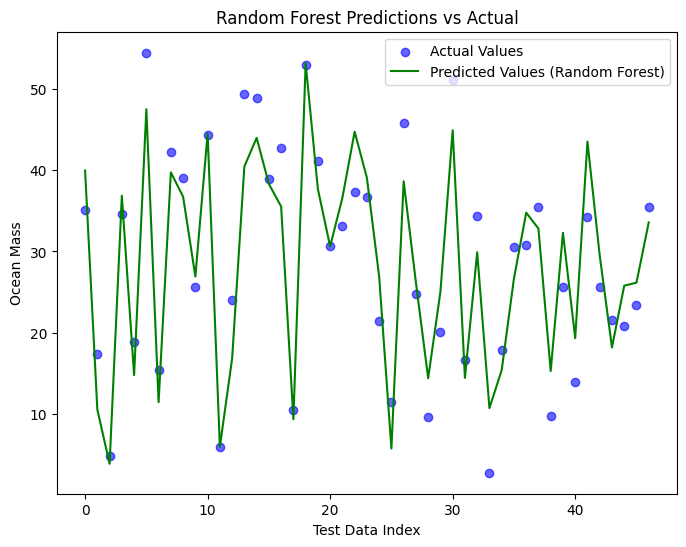

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue', alpha=0.6)
plt.plot(range(len(y_test)), y_pred_rf, label='Predicted Values (Random Forest)', color='green')
plt.xlabel('Test Data Index')
plt.ylabel('Ocean Mass')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()

##3. Predictive Modelling (XGBoost)

In [ ]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb}, R²: {r2_xgb}")

XGBoost - MAE: 4.438482162394423, R²: 0.8213477978176142


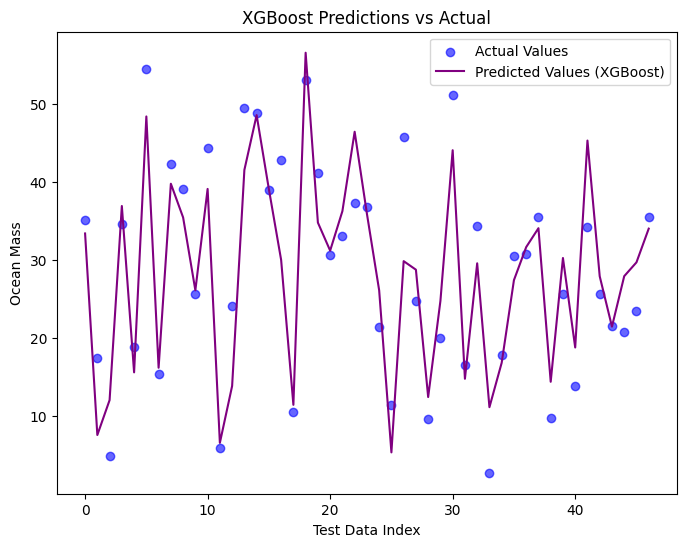

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue', alpha=0.6)
plt.plot(range(len(y_test)), y_pred_xgb, label='Predicted Values (XGBoost)', color='purple')
plt.xlabel('Test Data Index')
plt.ylabel('Ocean Mass')
plt.title('XGBoost Predictions vs Actual')
plt.legend()
plt.show()

#Predictive Modelling (Metrics Evaluation)

In [ ]:
import pandas as pd

# Compile results into a table
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae_linear, mae_rf, mae_xgb],
    'R²': [r2_linear, r2_rf, r2_xgb]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model       MAE        R²
0  Linear Regression  4.960094  0.785983
1      Random Forest  4.052119  0.877344
2            XGBoost  4.438482  0.821348


# **Time Series Forecasting**

In [ ]:
# Ensure the time column is in datetime format and set as index
combined_data['Time'] = pd.to_datetime(combined_data['Time'])
combined_data.set_index('Time', inplace=True)

# Extract the target variable (e.g., Ocean Mass)
ocean_mass = combined_data['mass_ocean']

In [ ]:
# Define train-test split
train_size = int(0.8 * len(ocean_mass))
train, test = ocean_mass[:train_size], ocean_mass[train_size:]

In [ ]:
last_date = ocean_mass.index[-1]
target_date = pd.Timestamp('2030-01-01')
forecast_steps = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

##1. Time Series Forecasting (ARIMA)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))  # Adjust (p, d, q) as needed
arima_model_fit = arima_model.fit()

# Forecast
arima_forecast = arima_model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [ ]:
!pip install scikit-learn
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
arima_forecast_test = arima_model_fit.forecast(steps=len(test))
#The line below was changed to call the imported mean_absolute_percentage_error function.
mape_arima = mean_absolute_percentage_error(test, arima_forecast_test)
rmse_arima = mean_squared_error(test, arima_forecast_test, squared=False)
r2_arima = r2_score(test, arima_forecast_test)
print(f"ARIMA - MAPE: {mape_arima}, RMSE: {rmse_arima}, R²: {r2_arima}")

ARIMA - MAPE: 0.1561962975736601, RMSE: 9.306338686443318, R²: -0.905872250134965


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<ipython-input-57-1c5bf262f6b2>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:], arima_forecast, label='ARIMA Forecast to 2030', color='orange')


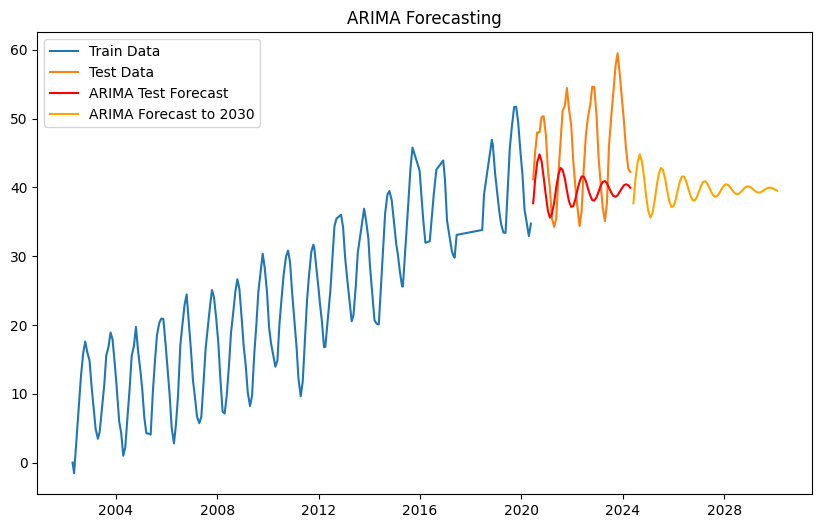

In [ ]:
# Plot ARIMA
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, arima_forecast_test, label='ARIMA Test Forecast', color='red')
plt.plot(pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:], arima_forecast, label='ARIMA Forecast to 2030', color='orange')
plt.legend()
plt.title('ARIMA Forecasting')
plt.show()

##2. Time Series Forecasting (SARIMA)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Train SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust (p, d, q, P, D, Q, s)
sarima_model_fit = sarima_model.fit()

# Forecast to 2030
sarima_forecast = sarima_model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Evaluate SARIMA
sarima_forecast_test = sarima_model_fit.forecast(steps=len(test))
mape_sarima = mean_absolute_percentage_error(test, sarima_forecast_test)
rmse_sarima = mean_squared_error(test, sarima_forecast_test, squared=False)
r2_sarima = r2_score(test, sarima_forecast_test)
print(f"SARIMA - MAPE: {mape_sarima}, RMSE: {rmse_sarima}, R²: {r2_sarima}")

SARIMA - MAPE: 0.12040638580347983, RMSE: 6.847023518568551, R²: -0.031667426035909774


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<ipython-input-60-504e3a23dd01>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:], sarima_forecast, label='SARIMA Forecast to 2030', color='purple')


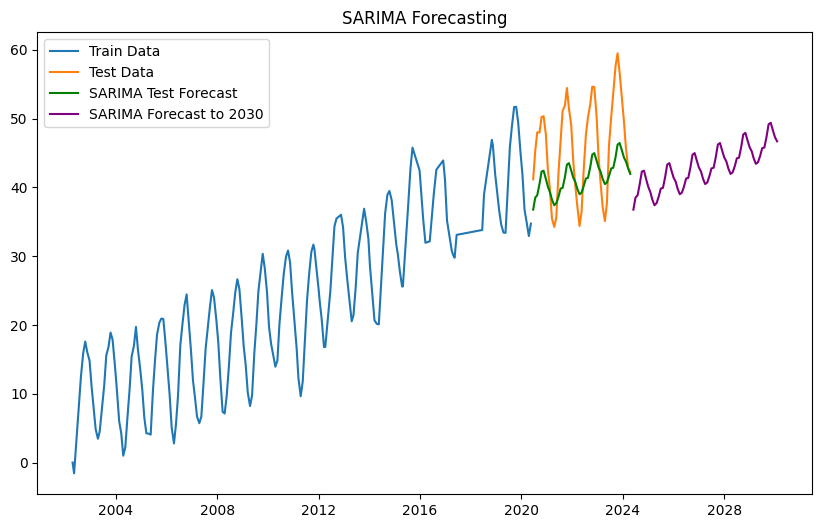

In [ ]:
# Plot SARIMA
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, sarima_forecast_test, label='SARIMA Test Forecast', color='green')
plt.plot(pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:], sarima_forecast, label='SARIMA Forecast to 2030', color='purple')
plt.legend()
plt.title('SARIMA Forecasting')
plt.show()

##3. Time Series Forecasting (Prophet)

In [ ]:
# Prepare data for Prophet
prophet_data = ocean_mass.reset_index()
prophet_data.columns = ['ds', 'y']  # Rename columns for Prophet

from prophet import Prophet
prophet_model = Prophet()
prophet_model.fit(prophet_data)  # Train on the entire dataset

# Extend future DataFrame to 2030
future_2030 = prophet_model.make_future_dataframe(periods=forecast_steps, freq='M')

# Forecast till 2030
prophet_forecast_2030 = prophet_model.predict(future_2030)

# Assuming 'ocean_mass' has a DateTimeIndex, create a future DataFrame
future = pd.DataFrame({'ds': pd.date_range(start=ocean_mass.index[-1], periods=len(test) + 1, freq='M')[1:]})

# Evaluate Prophet
prophet_forecast_test = prophet_model.predict(future)['yhat']
mape_prophet = mean_absolute_percentage_error(test, prophet_forecast_test)
rmse_prophet = mean_squared_error(test, prophet_forecast_test, squared=False)
r2_prophet = r2_score(test, prophet_forecast_test)
print(f"Prophet - MAPE: {mape_prophet}, RMSE: {rmse_prophet}, R²: {r2_prophet}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi3izpl3l/enqdsio8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi3izpl3l/pakb1tt4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40944', 'data', 'file=/tmp/tmpi3izpl3l/enqdsio8.json', 'init=/tmp/tmpi3izpl3l/pakb1tt4.json', 'output', 'file=/tmp/tmpi3izpl3l/prophet_model0hnbtw28/prophet_model-20241202053707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:37:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:37:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

Prophet - MAPE: 0.14525262407166187, RMSE: 7.167501797472607, R²: -0.13050295049077776


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


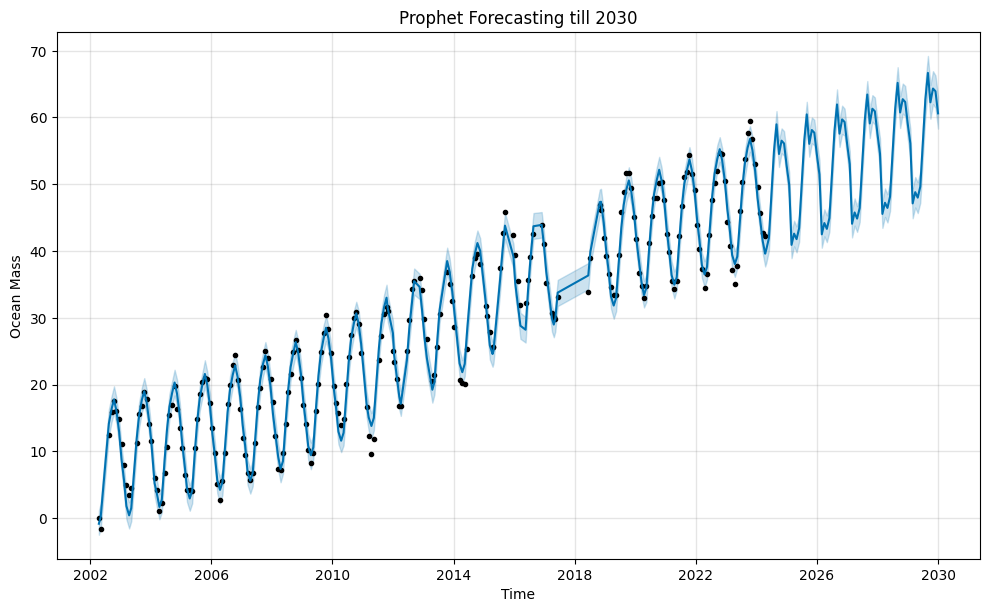

In [ ]:
# Plot the forecast
prophet_model.plot(prophet_forecast_2030)
plt.title('Prophet Forecasting till 2030')
plt.xlabel('Time')
plt.ylabel('Ocean Mass')
plt.show()

#Time Series Forecasting (Metrics Evaluation)

In [ ]:
results = {
    'Model': ['ARIMA', 'SARIMA', 'Prophet'],
    'MAPE': [mape_arima, mape_sarima, mape_prophet],
    'RMSE': [rmse_arima, rmse_sarima, rmse_prophet],
    'R²': [r2_arima, r2_sarima, r2_prophet]
}

results_df = pd.DataFrame(results)
print(results_df)

     Model      MAPE      RMSE        R²
0    ARIMA  0.156196  9.306339 -0.905872
1   SARIMA  0.120406  6.847024 -0.031667
2  Prophet  0.145253  7.167502 -0.130503
